In [36]:
import pandas as pd
import numpy as np
#import altair as alt
import glob
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
files = glob.glob("../../data/processed/*.csv")
files

['../../data/processed\\google_trends.csv',
 '../../data/processed\\noaa.weather.stations.csv',
 '../../data/processed\\noaa.weather.top20stn.csv',
 '../../data/processed\\Ohare_Climate.csv',
 '../../data/processed\\wnv.trap.date.csv',
 '../../data/processed\\wnv.trap.date.species.csv',
 '../../data/processed\\wnv.traps.csv']

In [5]:
input_data_list = [pd.read_csv(_) for _ in files]

C:\Users\hw831\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2903: DtypeWarning: Columns (10,12,14,16,18,20,22,24,26,30,32,38,40,42,54,78,82,84,88,90,92,94,96,98,100,102,104) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


# `ohare_climate.csv`

In [4]:
input_data_list[0].head()

,Year,Month,Day,Max in F,Min in F,Rain,Snow,Snow ground
0,2017,1,1,40.0,17.0,0,0,0.0
1,2017,1,2,40.0,25.0,0.11,0,0.0
2,2017,1,3,39.0,19.0,T,0,0.0
3,2017,1,4,19.0,7.0,0,0,0.0
4,2017,1,5,13.0,3.0,T,T,0.0


In [5]:
input_data_list[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 8 columns):
Year           730 non-null int64
Month          730 non-null int64
Day            730 non-null int64
Max in F       729 non-null float64
Min in F       729 non-null float64
Rain           729 non-null object
Snow           729 non-null object
Snow ground    729 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 45.7+ KB


# `wnv.trap.date.species.csv`

In [47]:
df = input_data_list[1]
df.sample(10)

,STATION,NAME,location,LATITUDE,LONGITUDE,ELEVATION,nrows,min.date,max.date,AWND.n,...,SN53.n,SX53.n,tavg2.n,ZCTA5CE10,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,community
166,US1ILDP0081,"GLEN ELLYN 2.3 N, IL US","(41.8993,-88.0604)",41.8993,-88.0604,221.6,605,2009-05-30,2012-03-15,0,...,0,0,0,60137,17.0,43.0,841705.0,3.0,1.704384e+11,NaN
153,US1ILDP0063,"BARTLETT 1.0 SSE, IL US","(41.9641,-88.2014)",41.9641,-88.2014,242.0,2177,2008-03-18,2015-01-31,0,...,0,0,0,60103,17.0,43.0,841327.0,2.0,1.704384e+11,NaN
191,US1ILDP0135,"DOWNERS GROVE 3.1 SSE, IL US","(41.7533,-88.0021)",41.7533,-88.0021,236.8,396,2015-12-28,2017-02-13,0,...,0,0,0,60516,17.0,43.0,845704.0,2.0,1.704385e+11,NaN
86,US1ILCK0193,"WINNETKA 0.8 ESE, IL US","(42.1016,-87.729)",42.1016,-87.7290,192.0,1941,2011-11-17,2018-12-30,0,...,0,0,0,60093,17.0,31.0,800400.0,2.0,1.703180e+11,NaN
195,US1ILDP0144,"GLEN ELLYN 2.2 SSE, IL US","(41.8353,-88.0509)",41.8353,-88.0509,208.8,105,2016-08-24,2017-10-15,0,...,0,0,0,60137,17.0,43.0,842708.0,1.0,1.704384e+11,NaN
114,US1ILCK0266,"MIDLOTHIAN 0.2 SW, IL US","(41.6238,-87.727)",41.6238,-87.7270,190.2,364,2015-05-08,2017-08-11,0,...,0,0,0,60445,17.0,31.0,824701.0,1.0,1.703182e+11,NaN
221,US1ILWL0066,"FRANKFORT 2.0 NNE, IL US","(41.5239,-87.8195)",41.5239,-87.8195,211.8,363,2010-04-10,2012-09-18,0,...,0,0,0,60423,17.0,197.0,883513.0,1.0,1.719788e+11,NaN
267,US1INLK0063,"GARY 4.8 ENE, IN US","(41.617,-87.2546)",41.6170,-87.2546,186.5,1945,2013-03-20,2018-12-30,0,...,0,0,0,46403,NaN,NaN,NaN,NaN,NaN,NaN
231,US1ILWL0106,"FRANKFORT 2.3 ENE, IL US","(41.5105,-87.7962)",41.5105,-87.7962,221.3,145,2013-05-30,2014-09-21,0,...,0,0,0,60423,17.0,197.0,883505.0,5.0,1.719788e+11,NaN
229,US1ILWL0097,"NEW LENOX 3.3 E, IL US","(41.5193,-87.9193)",41.5193,-87.9193,207.0,2407,2012-04-26,2018-12-30,0,...,0,0,0,60451,17.0,197.0,881105.0,3.0,1.719788e+11,NaN


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 68 columns):
STATION      303 non-null object
NAME         303 non-null object
location     303 non-null object
LATITUDE     303 non-null float64
LONGITUDE    303 non-null float64
ELEVATION    303 non-null float64
nrows        303 non-null int64
min.date     303 non-null object
max.date     303 non-null object
AWND.n       303 non-null int64
DAPR.n       303 non-null int64
DASF.n       303 non-null int64
EVAP.n       303 non-null int64
FMTM.n       303 non-null int64
MDPR.n       303 non-null int64
MDSF.n       303 non-null int64
MNPN.n       303 non-null int64
MXPN.n       303 non-null int64
PGTM.n       303 non-null int64
PRCP.n       303 non-null int64
SN32.n       303 non-null int64
SN52.n       303 non-null int64
SNOW.n       303 non-null int64
SNWD.n       303 non-null int64
SX32.n       303 non-null int64
SX52.n       303 non-null int64
TAVG.n       303 non-null int64
TMAX.n       303 non

# `noaa.weather.stations.csv`

In [8]:
input_data_list[2].head()

,STATION,NAME,location,LATITUDE,LONGITUDE,ELEVATION,nrows,min.date,max.date,AWND.n,...,SN53.n,SX53.n,tavg2.n,ZCTA5CE10,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,community
0,US1ILCK0005,"HARWOOD HEIGHTS 1.0 ENE, IL US","(41.9704,-87.7879)",41.9704,-87.7879,192.0,446,2006-12-20,2009-01-17,0,...,0,0,0,60630,17.0,31.0,110300.0,4.0,1.703111e+11,JEFFERSON PARK
1,US1ILCK0007,"LANSING 1.7 SSE, IL US","(41.5428,-87.539)",41.5428,-87.5390,185.9,951,2006-12-01,2009-12-18,0,...,0,0,0,60411,17.0,31.0,828506.0,1.0,1.703183e+11,NaN
2,US1ILCK0010,"CHICAGO 3.0 N, IL US","(41.8798,-87.6823)",41.8798,-87.6823,181.1,165,2007-08-21,2010-09-16,0,...,0,0,0,60612,17.0,31.0,838000.0,1.0,1.703184e+11,NEAR WEST SIDE
3,US1ILCK0011,"OAK LAWN 1.6 NW, IL US","(41.7287,-87.7763)",41.7287,-87.7763,189.9,230,2007-02-21,2008-12-09,0,...,0,0,0,60453,17.0,31.0,822301.0,4.0,1.703182e+11,NaN
4,US1ILCK0012,"BRIDGEVIEW 1.3 NNW, IL US","(41.755,-87.8173)",41.7550,-87.8173,188.1,4290,2006-12-19,2018-12-30,0,...,0,0,0,60455,17.0,31.0,820501.0,3.0,1.703182e+11,NaN


In [9]:
input_data_list[2].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 68 columns):
STATION      303 non-null object
NAME         303 non-null object
location     303 non-null object
LATITUDE     303 non-null float64
LONGITUDE    303 non-null float64
ELEVATION    303 non-null float64
nrows        303 non-null int64
min.date     303 non-null object
max.date     303 non-null object
AWND.n       303 non-null int64
DAPR.n       303 non-null int64
DASF.n       303 non-null int64
EVAP.n       303 non-null int64
FMTM.n       303 non-null int64
MDPR.n       303 non-null int64
MDSF.n       303 non-null int64
MNPN.n       303 non-null int64
MXPN.n       303 non-null int64
PGTM.n       303 non-null int64
PRCP.n       303 non-null int64
SN32.n       303 non-null int64
SN52.n       303 non-null int64
SNOW.n       303 non-null int64
SNWD.n       303 non-null int64
SX32.n       303 non-null int64
SX52.n       303 non-null int64
TAVG.n       303 non-null int64
TMAX.n       303 non

# `google_trends.csv`

In [10]:
input_data_list[3].head()

,date,googtrend_sym_wnv,googtrend_deadbirds,googtrend_westnile,googtrend_mosq_bites
0,2004-01,0,0,5,0
1,2004-02,36,0,6,0
2,2004-03,0,5,8,0
3,2004-04,0,0,14,0
4,2004-05,0,0,20,0


In [11]:
input_data_list[3].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 5 columns):
date                    181 non-null object
googtrend_sym_wnv       181 non-null int64
googtrend_deadbirds     181 non-null int64
googtrend_westnile      181 non-null int64
googtrend_mosq_bites    181 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.1+ KB


# `noaa.weather.top20stn.csv`

In [12]:
input_data_list[4].head()

,Unnamed: 0,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,AWND_ATTRIBUTES,DAPR,...,WT22_ATTRIBUTES,SN53,SN53_ATTRIBUTES,SX53,SX53_ATTRIBUTES,date,yr,date2,mo,tavg2
0,243,USC00115763,"MONEE RESERVOIR, IL US",41.39355,-87.76438,225.6,2006-01-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2006-01-01,2006,2006-01-01,1,NaN
1,244,USC00115763,"MONEE RESERVOIR, IL US",41.39355,-87.76438,225.6,2006-01-02,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2006-01-02,2006,2006-01-02,1,NaN
2,245,USC00115763,"MONEE RESERVOIR, IL US",41.39355,-87.76438,225.6,2006-01-03,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2006-01-03,2006,2006-01-03,1,NaN
3,246,USC00115763,"MONEE RESERVOIR, IL US",41.39355,-87.76438,225.6,2006-01-04,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2006-01-04,2006,2006-01-04,1,NaN
4,247,USC00115763,"MONEE RESERVOIR, IL US",41.39355,-87.76438,225.6,2006-01-05,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2006-01-05,2006,2006-01-05,1,NaN


In [13]:
input_data_list[4].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90077 entries, 0 to 90076
Columns: 114 entries, Unnamed: 0 to tavg2
dtypes: float64(58), int64(3), object(53)
memory usage: 78.3+ MB


# `wnv.trap.date.csv`

In [49]:
df = input_data_list[5]
df.sample(10)

,Unnamed: 0,trap.name,lat,lng,lat.lng.src,satellite.ind,trap_type,date,mo,wk,...,erraticus.WnvPresent,pipiens.WnvPresent,pipiens_restuans.WnvPresent,restuans.WnvPresent,salinarius.WnvPresent,tarsalis.WnvPresent,territans.WnvPresent,unspecified.WnvPresent,any.WnvPresent,NumMosquitos
31132,31133,T054B,41.922064,-87.632233,CDPH,True,GRAVID,2018-08-16,8,33,...,False,False,False,False,False,False,False,False,False,1
100613,100614,T073,41.773085,-87.600168,CDPH,False,GRAVID,2010-09-23,9,38,...,False,False,False,False,False,False,False,False,False,0
72931,72932,T066,41.771199,-87.703107,CDPH,False,GRAVID,2017-09-08,9,36,...,False,False,False,False,False,False,False,False,False,0
26788,26789,T913,41.973889,-87.890790,Google,False,GRAVID,2012-07-27,7,30,...,False,False,True,False,False,False,False,False,True,0
102761,102762,T102,41.695494,-87.609082,CDPH,False,GRAVID,2014-08-14,8,33,...,False,True,False,False,False,False,False,False,True,0
13585,13586,T924,41.973889,-87.890790,Google,False,GRAVID,2015-08-20,8,34,...,False,False,False,False,False,False,False,False,False,0
94600,94601,T906,41.973889,-87.890790,Google,False,GRAVID,2013-08-01,8,31,...,False,False,True,False,False,False,False,False,True,0
90396,90397,T147,41.932790,-87.700238,CDPH,False,GRAVID,2014-07-31,7,31,...,False,False,False,False,False,False,False,False,False,0
121250,121251,T240B,41.919193,-87.664761,CDPH,True,SENTINEL,2017-07-20,7,29,...,False,False,False,False,False,False,False,False,False,2
31714,31715,T065,41.778305,-87.754366,CDPH,False,GRAVID,2007-09-04,9,36,...,False,False,False,False,False,False,False,False,False,10


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122679 entries, 0 to 122678
Data columns (total 26 columns):
Unnamed: 0                     122679 non-null int64
trap.name                      122679 non-null object
lat                            122679 non-null float64
lng                            122679 non-null float64
lat.lng.src                    122679 non-null object
satellite.ind                  122679 non-null bool
trap_type                      122679 non-null object
date                           122679 non-null object
mo                             122679 non-null int64
wk                             122679 non-null int64
day.of.wk                      122679 non-null int64
day.of.wk.name                 122679 non-null object
location                       122679 non-null object
yr                             122679 non-null int64
species                        122679 non-null object
WnvPresent                     122679 non-null bool
erraticus.WnvPresent           1

In [61]:
df.date = pd.to_datetime(df.date)

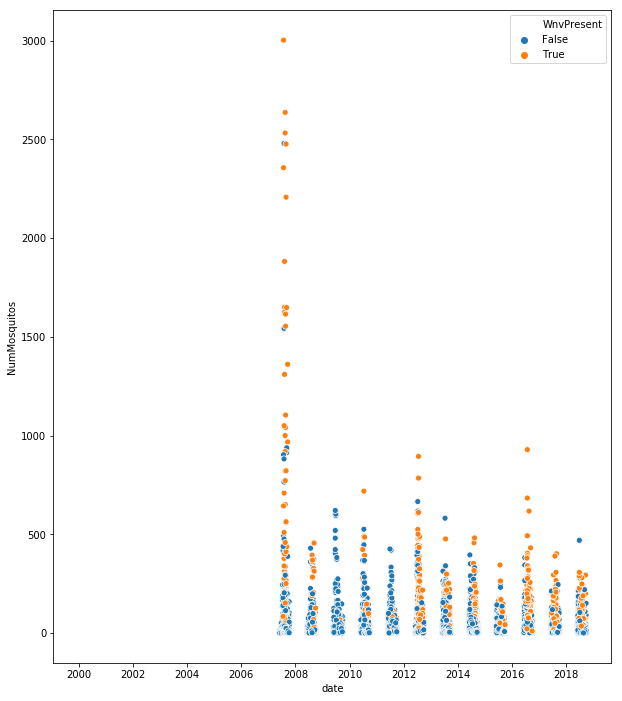

In [65]:
sns.scatterplot("date","NumMosquitos",data=df,hue="WnvPresent")

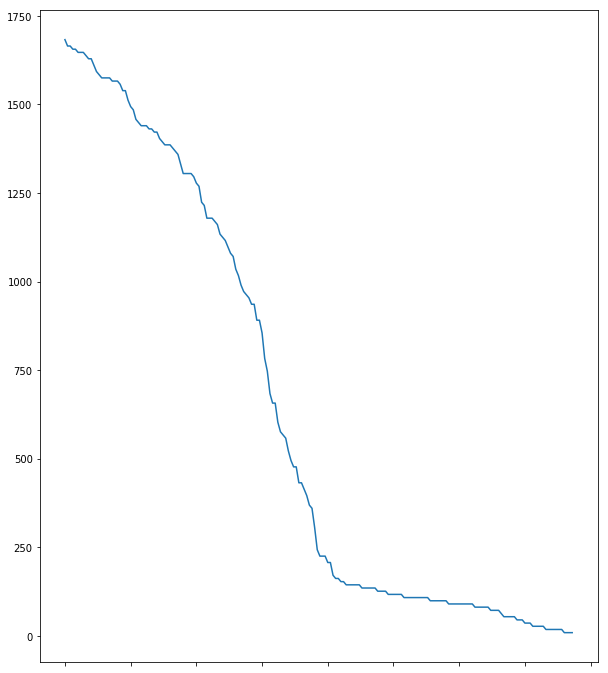

In [69]:
df["trap.name"].value_counts().plot()

# `wnv.traps.csv`

In [28]:
df = input_data_list[6]
df.sample(10)

,trapname,revlat,revlng,latlngsrc,satelliteind,zcta5ce10,statefp,countyfp,tractce,blkgrpce,geoid,community
178,T908,41.973889,-87.890790,Google,False,60018,17,31,980000,1,170319800001,OHARE
9,T006,41.990234,-87.797220,CDPH,False,60631,17,31,100300,3,170311003003,NORWOOD PARK
58,T065A,41.777343,-87.749666,CDPH,True,60638,17,31,640700,2,170316407002,CLEARING
129,T158,41.682180,-87.710092,CDPH,False,60655,17,31,740400,4,170317404004,MOUNT GREENWOOD
125,T154,41.920412,-87.752499,CDPH,False,60639,17,31,191100,5,170311911005,BELMONT CRAGIN
35,T037,41.921054,-87.795751,CDPH,False,60707,17,31,831600,4,170318316004,MONTCLARE
57,T065,41.778305,-87.754366,CDPH,False,60638,17,31,980100,1,170319801001,CLEARING
166,T240,41.918676,-87.664374,CDPH,False,60614,17,31,832500,2,170318325002,LINCOLN PARK
39,T044,41.884200,-87.620087,CDPH,False,60601,17,31,320100,1,170313201001,LOOP
18,T015,41.974183,-87.825241,CDPH,False,60656,17,31,100500,5,170311005005,NORWOOD PARK


In [18]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('.', '')
df.describe()

,revlat,revlng,zcta5ce10,statefp,countyfp,tractce,blkgrpce,geoid
count,194.000000,194.000000,194.000000,194.0,194.0,194.000000,194.000000,1.940000e+02
mean,41.853017,-87.711265,60556.324742,17.0,31.0,522234.201031,2.061856,1.703152e+11
std,0.116687,0.096740,203.799029,0.0,0.0,316796.233084,1.294183,3.167962e+06
min,41.644720,-87.890790,60018.000000,17.0,31.0,10400.000000,1.000000,1.703101e+11
25%,41.743594,-87.775157,60614.000000,17.0,31.0,175975.250000,1.000000,1.703118e+11
50%,41.883986,-87.696072,60628.500000,17.0,31.0,550100.000000,2.000000,1.703155e+11
75%,41.965404,-87.645032,60639.000000,17.0,31.0,832500.000000,2.750000,1.703183e+11
max,42.017801,-87.531060,60827.000000,17.0,31.0,980100.000000,6.000000,1.703198e+11


<BarContainer object of 63 artists>

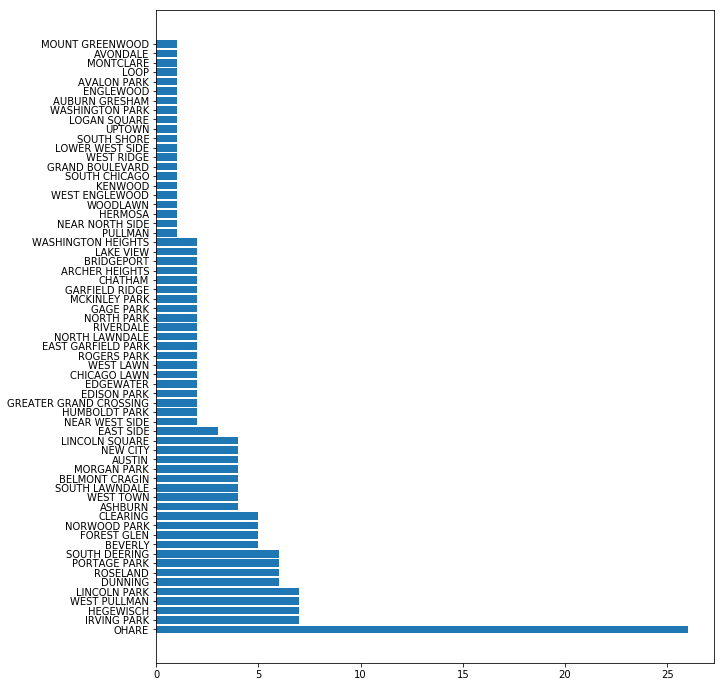

In [46]:
plt.rcParams['figure.figsize'] = [10, 12]
plt.barh(df.community.value_counts().index,df.community.value_counts())

<BarContainer object of 2 artists>

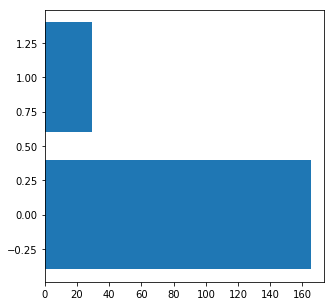

In [24]:
plt.rcParams['figure.figsize'] = [5, 5]
df_counts = df.satelliteind.value_counts()
plt.barh(df_counts.index,df_counts)

<BarContainer object of 2 artists>

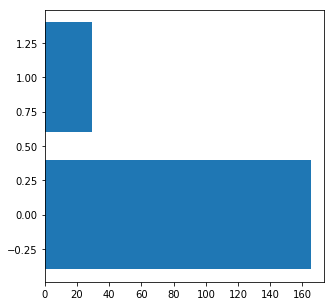

In [23]:
plt.rcParams['figure.figsize'] = [5, 5]
df_counts = df.satelliteind.value_counts()
plt.barh(df_counts.index,df_counts)

<BarContainer object of 6 artists>

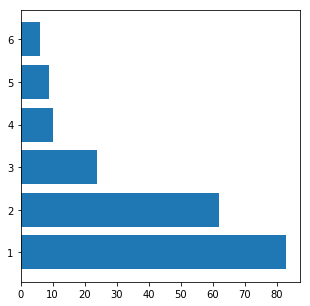

In [22]:
plt.rcParams['figure.figsize'] = [5, 5]
df_counts = df.blkgrpce.value_counts()
plt.barh(df_counts.index,df_counts)

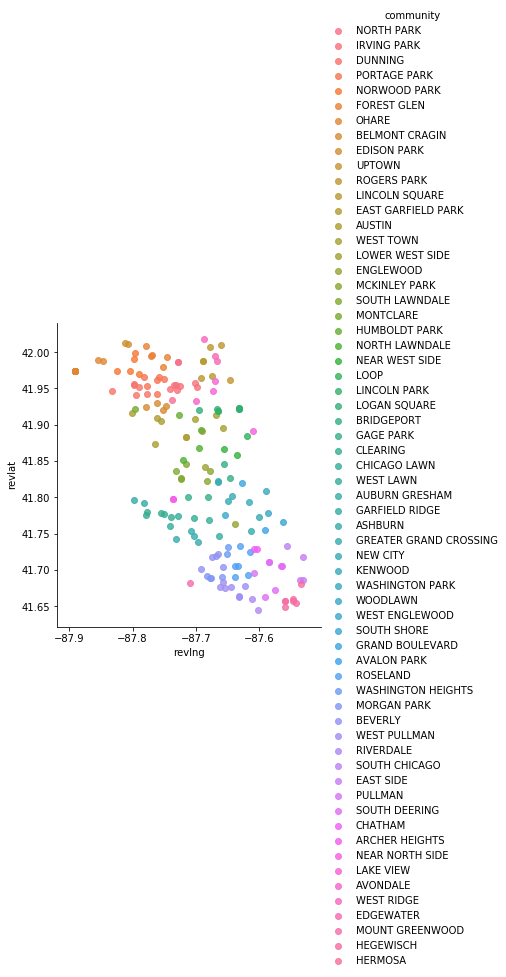

In [43]:
sns.lmplot("revlng","revlat",df,fit_reg=False,hue="community")